# EDA for Border Aprehension Data
## Purpose: 
This file will be used to perform EDA on the border dataset aggregated by US Customs and Border Patrol region. This will help in understanding and interpreting the data for funcitons such as data imputation, understanding the range of the data, and any patterns and trends that occur. 

In [1]:
# Import setup file
import sys
import os

code_folder_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(code_folder_path)
from _setup import *

In [2]:
# Import the sector data
sector_df = pd.read_csv(sector_data_csv_path)
sector_df.head()

C:\Users\Trevo\AppData\Local\Temp\ipykernel_46960\99905383.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  sector_df = pd.read_csv(sector_data_csv_path)


,Fiscal Year,Month Grouping,Month (abbv),Component,Land Border Region,Area of Responsibility,AOR (Abbv),Demographic,Citizenship,Title of Authority,Encounter Type,Encounter Count
0,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,BRAZIL,Title 8,Inadmissibles,2
1,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,FMUA,OTHER,Title 8,Inadmissibles,29
2,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,BRAZIL,Title 8,Inadmissibles,1
3,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,CANADA,Title 8,Inadmissibles,1031
4,2020,FYTD,OCT,Office of Field Operations,Northern Land Border,Boston Field Office,Boston,Single Adults,"CHINA, PEOPLES REPUBLIC OF",Title 8,Inadmissibles,9


Quck aside: Looks like the Fiscal year column has mixed types, that will need to be examined in the EDA

### Check for missing values:

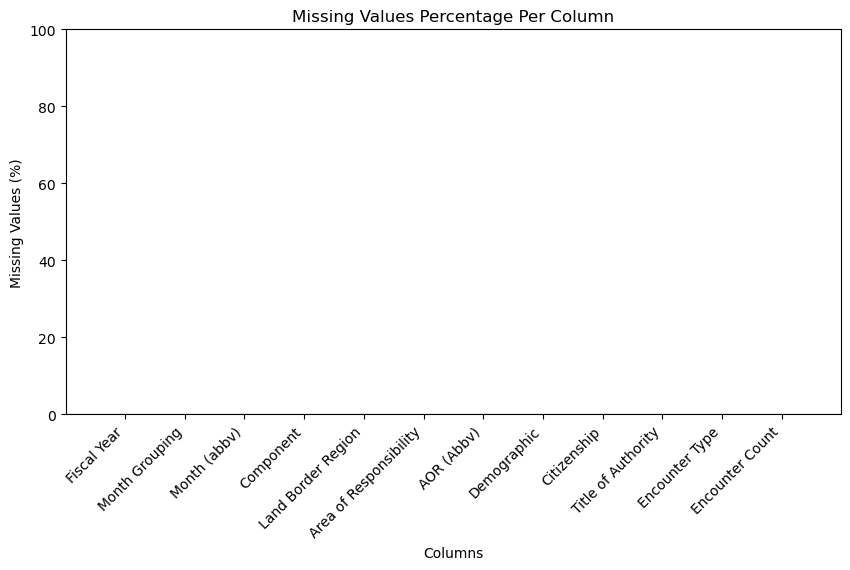

In [3]:
# Calculate missing values percentage
missing_percent = (sector_df.isnull().sum() / len(sector_df)) * 100

# Plot missing values percentage
plt.figure(figsize=(10, 5))
plt.bar(missing_percent.index, missing_percent.values, color='skyblue')
plt.axhline(0, color='black', linewidth=0.8)  # Reference line for zero missing values
plt.xticks(rotation=45, ha="right")
plt.xlabel("Columns")
plt.ylabel("Missing Values (%)")
plt.title("Missing Values Percentage Per Column")
plt.ylim(0, 100)  # Ensures a clear percentage scale
plt.show()

### Column Descriptions:
As can be seen from the graph, there are no missing values in any column, thus data imputation and handling missing values will not be a concern. To recap the initial problem analysis, the columns and their corresponding meanings are below: 
| Column Name            | Description                                            | 
|------------------------|--------------------------------------------------------|
| Fiscal Year           | The year that the migrant was encountered at the border |       
| Monthly Grouping      | Whether it was calendar or fiscal year recorded         |       
| Month (abbv)         | The month the migrant was encountered                   |       
| Component            | Which branch encountered the migrant                     |       
| Land Border Region   | Where the migrant was encountered                        |       
| Area of Responsibility | Which field office was responsible for the region      |       
| AOR (Abbv)           | Area of responsibility abbreviated                      |       
| Demographic          | Whether the individual was single, in a group, or a minor |      
| Citizenship          | The migrant's country of origin                          |       
| Title of Authority   | How the migrant was dealt with under immigration law     |       
| Encounter Type       | How the migrant was handled by US Border Customs & Patrol |      
| Encounter Count      | Aggregated number of migrants fitting the description    |       

In [4]:
from IPython.display import Markdown

# Assuming sector_data is your DataFrame
column_values = {
    col: ", ".join(map(str, sector_df[col].dropna().unique()[:5]))  # First 10 unique values
    for col in sector_df.columns
}

# Convert to DataFrame for easy Markdown formatting
values_df = pd.DataFrame(column_values.items(), columns=["Column Name", "First 5 Unique Values"])

# Convert DataFrame to Markdown format
markdown_table = values_df.to_markdown(index=False)

display(Markdown(markdown_table))

| Column Name            | First 5 Unique Values                                                                                        |
|:-----------------------|:-------------------------------------------------------------------------------------------------------------|
| Fiscal Year            | 2020, 2021, 2022, 2023, 2024                                                                                 |
| Month Grouping         | FYTD, Remaining                                                                                              |
| Month (abbv)           | OCT, NOV, DEC, JAN, FEB                                                                                      |
| Component              | Office of Field Operations, U.S. Border Patrol                                                               |
| Land Border Region     | Northern Land Border, Other, Southwest Land Border                                                           |
| Area of Responsibility | Boston Field Office, Buffalo Field Office, Detroit Field Office, Portland Field Office, Seattle Field Office |
| AOR (Abbv)             | Boston, Buffalo, Detroit, Portland, Seattle                                                                  |
| Demographic            | FMUA, Single Adults, Accompanied Minors, UC / Single Minors                                                  |
| Citizenship            | BRAZIL, OTHER, CANADA, CHINA, PEOPLES REPUBLIC OF, COLOMBIA                                                  |
| Title of Authority     | Title 8, Title 42                                                                                            |
| Encounter Type         | Inadmissibles, Apprehensions, Expulsions                                                                     |
| Encounter Count        | 2, 29, 1, 1031, 9                                                                                            |

### Notes:
Looking at the data dictionary, there are some alterations that need to be made:
- 'Remaining' in the month grouping implied current fiscal year by USCPB, therefore, from 2022 on (we merged a dataset to come to the current one) we must include 'remaining'
- In Fiscal Year, 2025 FYTD must be converted to 2025, followed by creating a yeardate to graph these columns more easily

In [5]:
sector_df.replace(to_replace="2025 (FYTD)", value=2025, inplace=True)
sector_df.replace(to_replace='2024', value=2024, inplace=True)
print(sector_df['Fiscal Year'].unique())

[2020 2021 2022 2023 2024 2025]


C:\Users\Trevo\AppData\Local\Temp\ipykernel_46960\3371552.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sector_df.replace(to_replace='2024', value=2024, inplace=True)


In [6]:
# Create a dictionary mapping month abbreviations (uppercase) to month numbers
month_abbr_to_num = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

# Function to convert Fiscal Year and Month (abbv) to a Year-Date
def convert_to_fiscal_year_date(row):
    month_num = month_abbr_to_num[row['Month (abbv)'].upper()]
    fiscal_year = int(row['Fiscal Year'])  # Convert Fiscal Year to integer
    
    # Adjust fiscal year for months January through September
    if month_num >= 10:  # Jan - Sep belong to the previous calendar year
        fiscal_year -= 1
    
    # Format the fiscal year and month into a date string
    return f"{fiscal_year}-{month_num:02d}-01"

# Apply the function to create a Year-Date column in fytd_df
sector_df['Year-Date'] = sector_df.apply(lambda row: convert_to_fiscal_year_date(row), axis=1)

# Convert the new column to datetime format
sector_df['Year-Date'] = pd.to_datetime(sector_df['Year-Date'], format='%Y-%m-%d')

# Display the dataframe with the new fiscal year-based Year-Date
print(sector_df['Year-Date'].unique())

<DatetimeArray>
['2019-10-01 00:00:00', '2019-11-01 00:00:00', '2019-12-01 00:00:00',
 '2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00',
 '2020-04-01 00:00:00', '2020-05-01 00:00:00', '2020-06-01 00:00:00',
 '2020-07-01 00:00:00', '2020-08-01 00:00:00', '2020-09-01 00:00:00',
 '2020-10-01 00:00:00', '2020-11-01 00:00:00', '2020-12-01 00:00:00',
 '2021-01-01 00:00:00', '2021-02-01 00:00:00', '2021-03-01 00:00:00',
 '2021-04-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
 '2021-07-01 00:00:00', '2021-08-01 00:00:00', '2021-09-01 00:00:00',
 '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00',
 '2022-01-01 00:00:00', '2022-02-01 00:00:00', '2022-03-01 00:00:00',
 '2022-04-01 00:00:00', '2022-05-01 00:00:00', '2022-06-01 00:00:00',
 '2022-07-01 00:00:00', '2022-08-01 00:00:00', '2022-09-01 00:00:00',
 '2022-10-01 00:00:00', '2022-11-01 00:00:00', '2022-12-01 00:00:00',
 '2023-01-01 00:00:00', '2023-02-01 00:00:00', '2023-03-01 00:00:00',
 '20

### Look for missing data points
Even though this data set is complete in the sense of there are not missing/NA values within the columns, there may still be missing data points in the sense that there were no recorded border crossings from a certain nationality at a spot along the border in a month. This would result in the data missing a value where one may be needed for graphing purposes. 

In [7]:
print(sector_df['Year-Date'].max())

2024-12-01 00:00:00


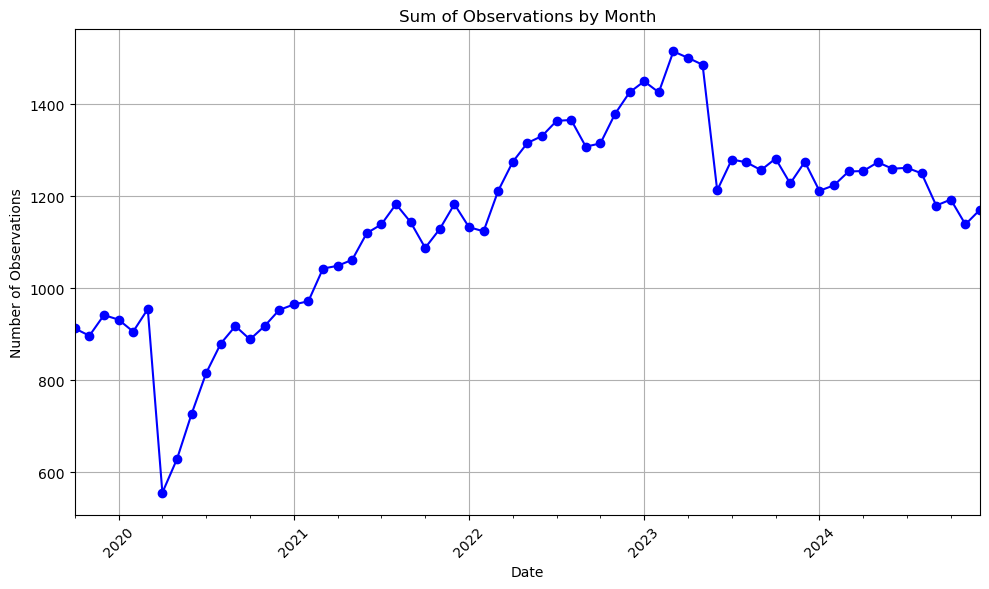

In [8]:
# Aggregate by Year-Date and count the number of observations
sector_agg = sector_df.groupby('Year-Date').size()

# Plot the aggregated data
plt.figure(figsize=(10, 6))
sector_agg.plot(kind='line', marker='o', color='b')
plt.title('Sum of Observations by Month')
plt.xlabel('Date')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

### Aggregate Total Count by AOR:

<Figure size 1200x600 with 0 Axes>

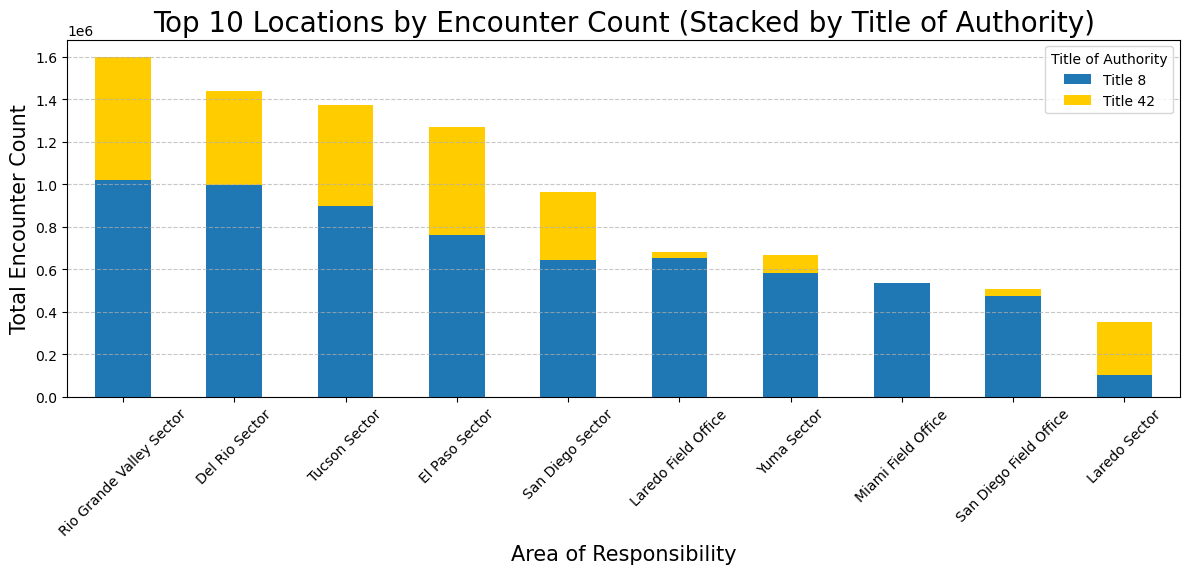

In [9]:
import seaborn as sns

# Aggregate by AOR (Abbv) and Title of Authority, summing Encounter Count
sector_agg = sector_df.groupby(['Area of Responsibility', 'Title of Authority'])['Encounter Count'].sum().reset_index()

# Get the top 10 locations by highest total Encounter Count
top_10_locations = sector_agg.groupby('Area of Responsibility')['Encounter Count'].sum().nlargest(10).index

# Filter the dataset to only include the top 10 locations
filtered_sector_agg = sector_agg[sector_agg['Area of Responsibility'].isin(top_10_locations)]

# Pivot the dataframe to have 'Title of Authority' as separate columns
pivot_df = filtered_sector_agg.pivot(index='Area of Responsibility', columns='Title of Authority', values='Encounter Count').fillna(0)

# Sort AORs from most to least by total encounter count
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

# Sort columns (Title of Authority) from most to least within each AOR
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]

# Custom color palette with a golden tone
custom_colors = sns.color_palette(["#1f77b4", "#ffcc00", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

# Plot the stacked bar chart
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', stacked=True, color=custom_colors, figsize=(12, 6))

# Formatting
plt.title('Top 10 Locations by Encounter Count (Stacked by Title of Authority)', size = 20)
plt.xlabel('Area of Responsibility', size = 15)  # Abbreviated area of responsibility
plt.ylabel('Total Encounter Count', size = 15)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Title of Authority')  # Legend for stack colors
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability
plt.tight_layout()

# Show the plot
plt.show()


### Aggregate Encounters by Component

<Figure size 600x600 with 0 Axes>

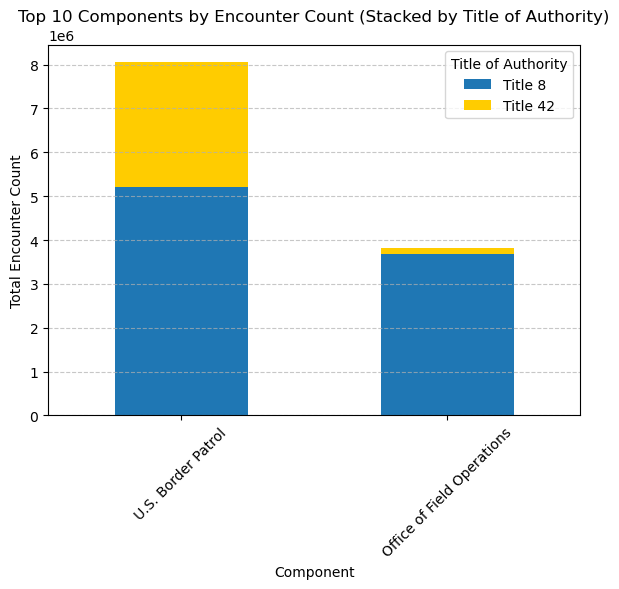

In [10]:
# Aggregate by Component and Title of Authority, summing Encounter Count
sector_agg = sector_df.groupby(['Component', 'Title of Authority'])['Encounter Count'].sum().reset_index()

# Get the top 10 Components by highest total Encounter Count
top_10_components = sector_agg.groupby('Component')['Encounter Count'].sum().nlargest(10).index

# Filter the dataset to only include the top 10 Components
filtered_sector_agg = sector_agg[sector_agg['Component'].isin(top_10_components)]

# Pivot the dataframe to have 'Title of Authority' as separate columns
pivot_df = filtered_sector_agg.pivot(index='Component', columns='Title of Authority', values='Encounter Count').fillna(0)

# Sort Components from most to least by total encounter count
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

# Sort columns (Title of Authority) from most to least within each Component
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]

# Custom color palette with a golden tone
custom_colors = sns.color_palette(["#1f77b4", "#ffcc00", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

# Plot the stacked bar chart
plt.figure(figsize=(6, 6))
pivot_df.plot(kind='bar', stacked=True, color=custom_colors, figsize=(6, 6))

# Formatting
plt.title('Top 10 Components by Encounter Count (Stacked by Title of Authority)')
plt.xlabel('Component') 
plt.ylabel('Total Encounter Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Title of Authority')  # Legend for stack colors
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

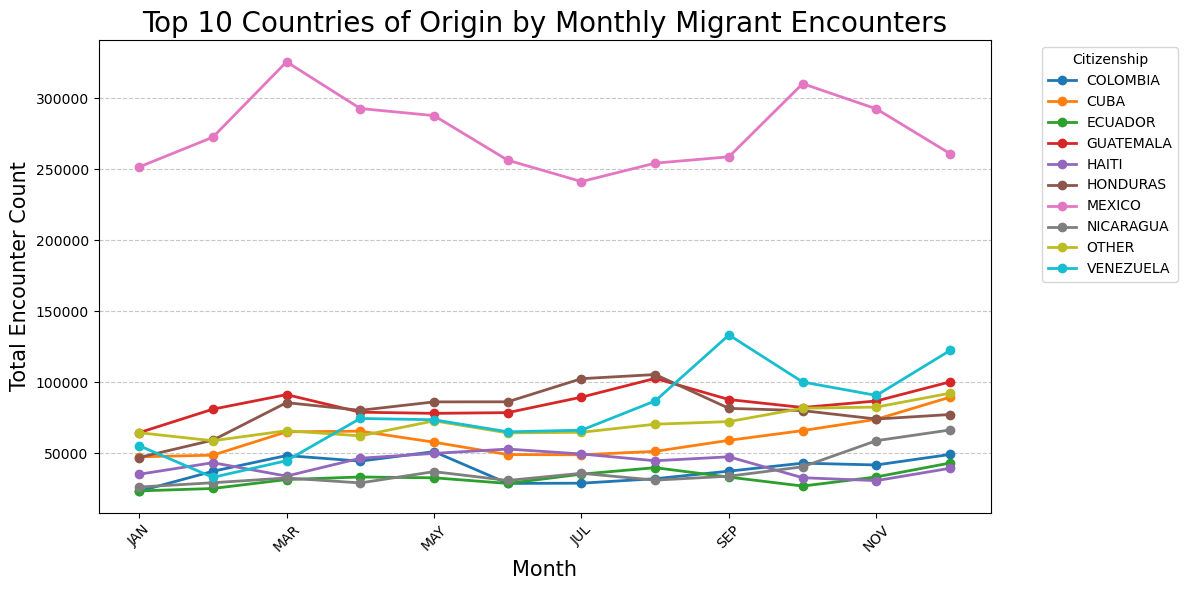

In [11]:
# Aggregate by Country of Origin and Month, summing Encounter Count
country_agg = sector_df.groupby(['Month (abbv)', 'Citizenship'])['Encounter Count'].sum().reset_index()

# Get the top 10 countries by highest total Encounter Count
top_10_countries = country_agg.groupby('Citizenship')['Encounter Count'].sum().nlargest(10).index

# Filter the dataset to only include the top 10 countries
filtered_country_agg = country_agg[country_agg['Citizenship'].isin(top_10_countries)]

# Pivot the dataframe for plotting (Month as index, Countries as columns)
pivot_df = filtered_country_agg.pivot(index='Month (abbv)', columns='Citizenship', values='Encounter Count').fillna(0)

# Ensure the months are in the correct order (assuming 'Month (abbv)' uses 3-letter abbreviations)
month_order = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
pivot_df = pivot_df.reindex(month_order)

# Plot the line chart
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='line', marker='o', colormap='tab10', linewidth=2, figsize=(12, 6))

# Formatting
plt.title('Top 10 Countries of Origin by Monthly Migrant Encounters', size=20)
plt.xlabel('Month', size = 15)
plt.ylabel('Total Encounter Count', size=15)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Citizenship', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability
plt.tight_layout()

# Show the plot
plt.show()

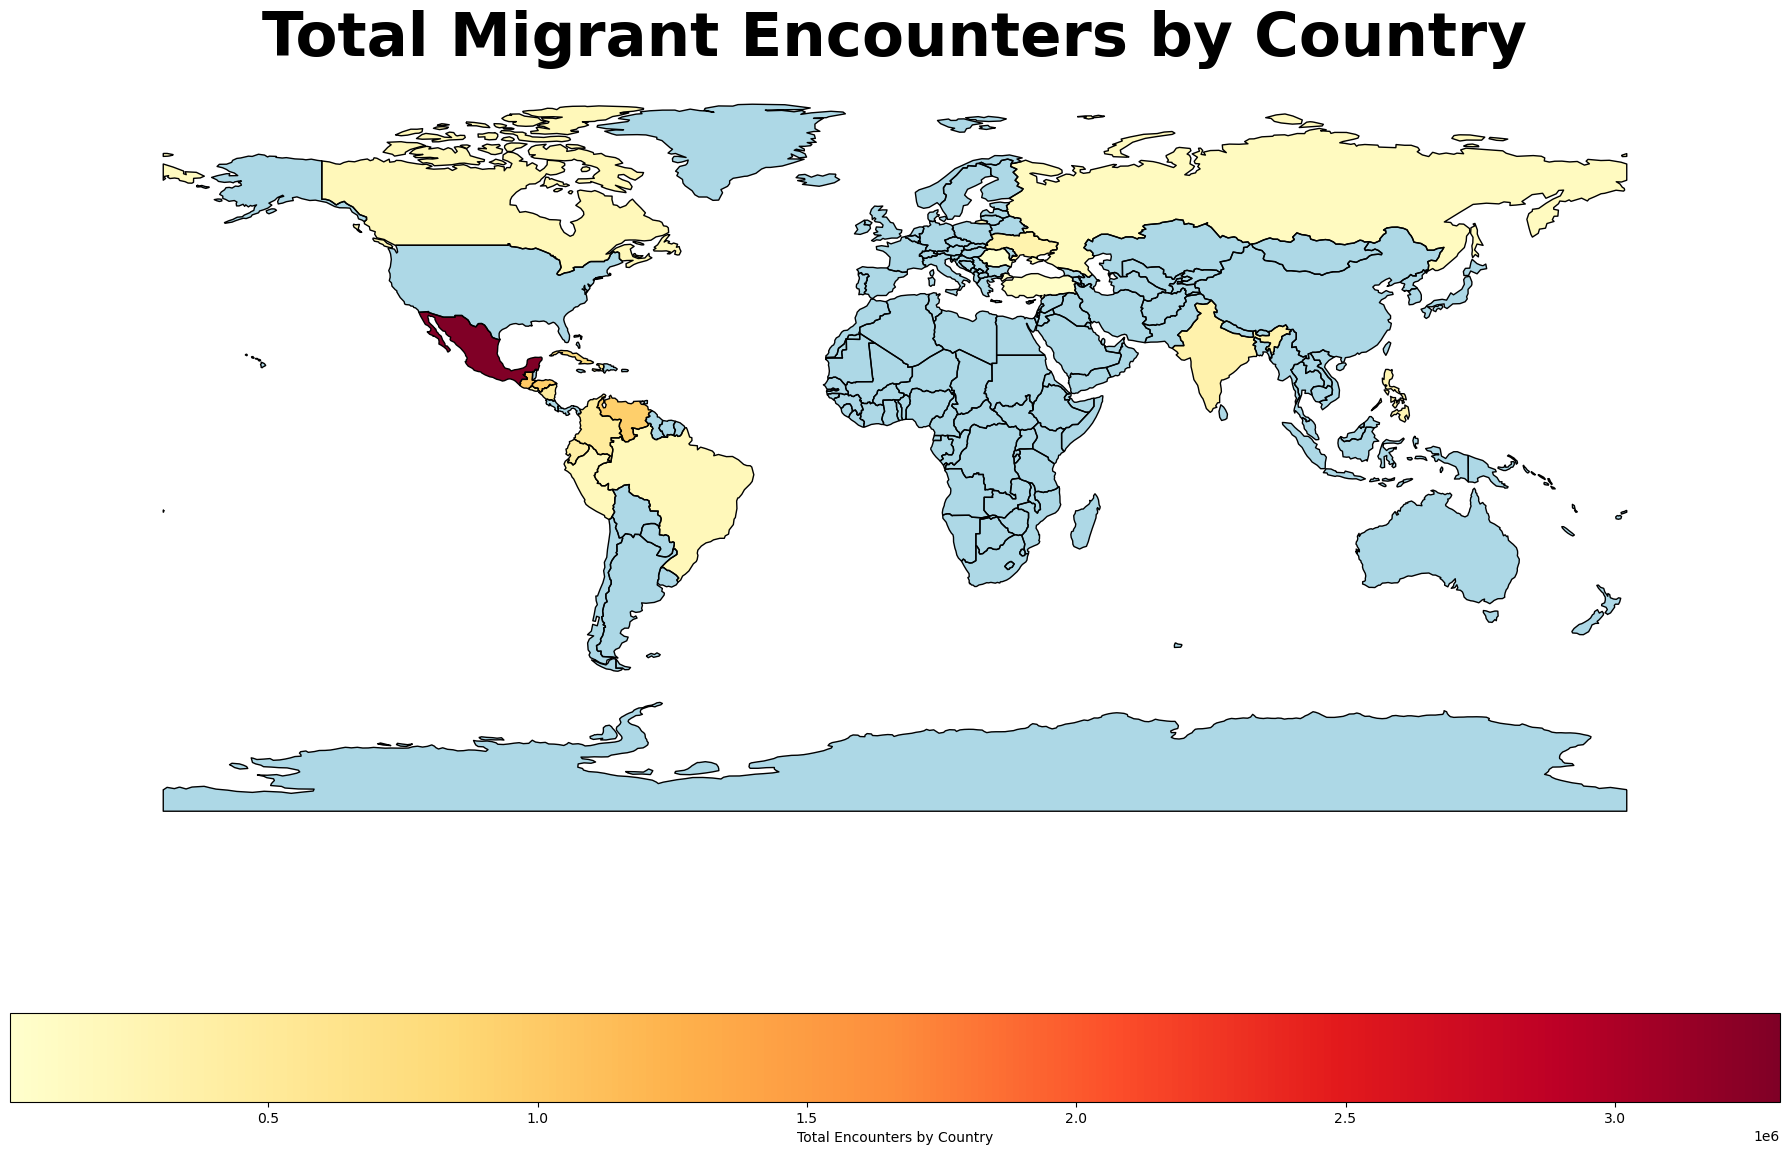

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the path to the shapefile (Credit here to NaturalEarthData)
shapefile_path = "../WorldMap/ne_110m_admin_0_countries.shp"

# Read the shapefile into a GeoDataFrame
world_map = gpd.read_file(shapefile_path)

# Aggregate the number of encounters by country
agg_by_country = sector_df.groupby('Citizenship')['Encounter Count'].sum()

# Convert the aggregated data into a dictionary
migrant_dict = agg_by_country.to_dict()

# Add a new column to the GeoDataFrame for the encounter values
world_map['value'] = world_map['NAME'].map(migrant_dict)

# Plot the country outlines with the heatmap
fig, ax = plt.subplots(figsize=(18, 12))  # Increased figure size for better visibility

# Plot the country boundaries
world_map.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the heatmap with color adjustments
world_map.plot(column='value', ax=ax, legend=True, cmap='YlOrRd', 
               missing_kwds={"color": "lightblue", "label": "No Data"},  # Color the oceans blue
               legend_kwds={'label': "Total Encounters by Country", 'orientation': "horizontal"})

# Set title with better font and alignment
ax.set_title('Total Migrant Encounters by Country', fontsize=44, fontweight='bold', ha='center')

# Increase the font size for axis labels
ax.tick_params(labelsize=100)

# Remove axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.tight_layout()  # Ensures that everything fits within the figure
plt.show()


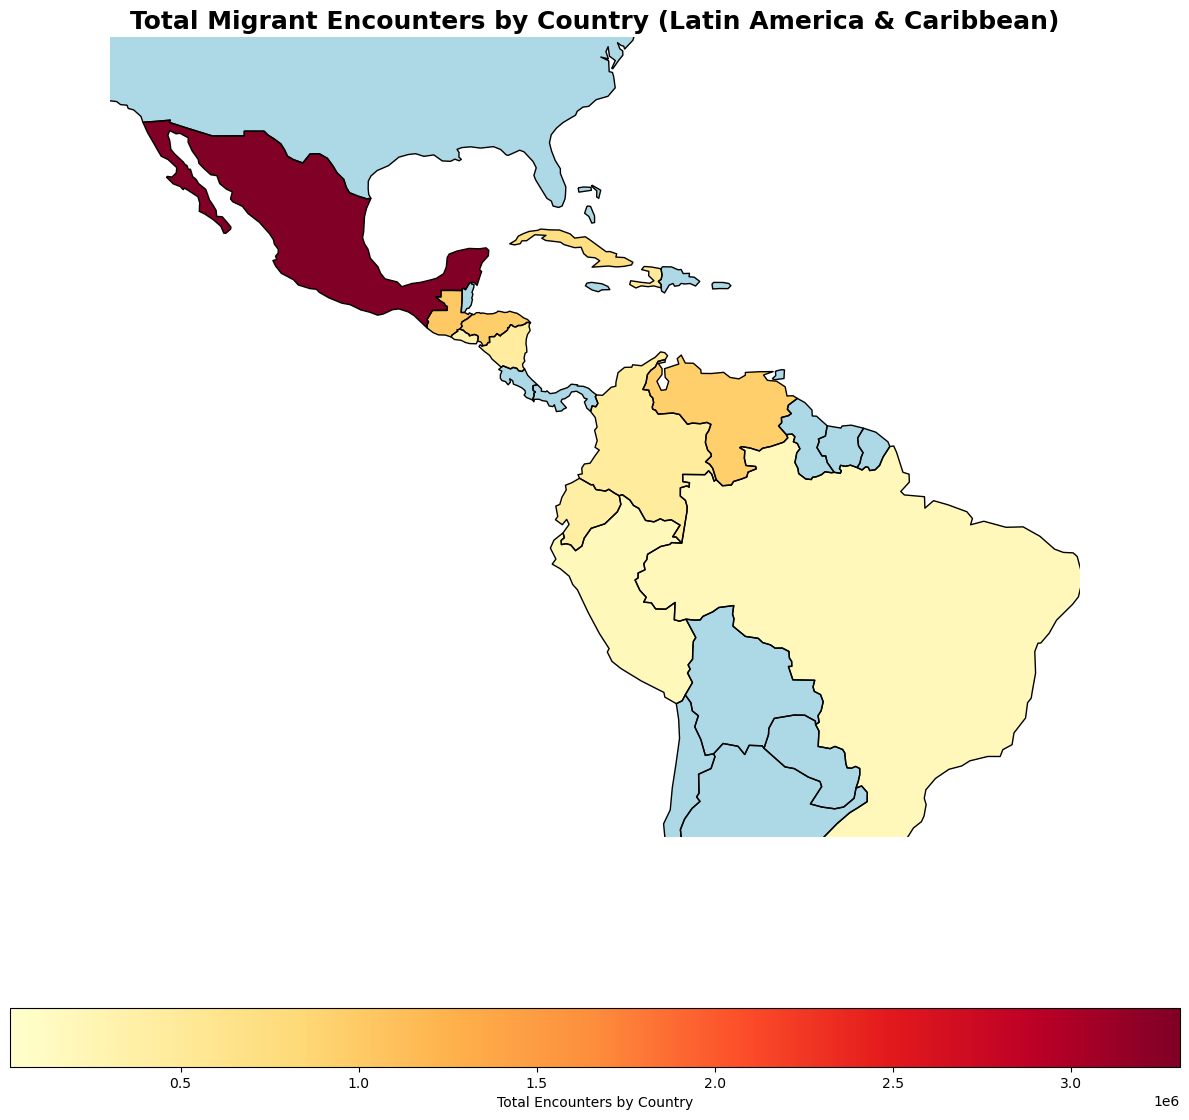

In [43]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the path to the shapefile
shapefile_path = "../WorldMap/ne_110m_admin_0_countries.shp"

# Read the shapefile into a GeoDataFrame
world_map = gpd.read_file(shapefile_path)

# Aggregate the number of encounters by country
agg_by_country = sector_df.groupby('Citizenship')['Encounter Count'].sum()

# Convert the aggregated data into a dictionary
migrant_dict = agg_by_country.to_dict()

# Add a new column to the GeoDataFrame for the encounter values
world_map['value'] = world_map['NAME'].map(migrant_dict)

# Plot the country outlines with the heatmap
fig, ax = plt.subplots(figsize=(12, 12))  # Increased figure size for better visibility

# Plot the country boundaries
world_map.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the heatmap with color adjustments
world_map.plot(column='value', ax=ax, legend=True, cmap='YlOrRd', 
               missing_kwds={"color": "lightblue", "label": "No Data"}, 
               legend_kwds={'label': "Total Encounters by Country", 'orientation': "horizontal"})

# Set title with better font and alignment
ax.set_title('Total Migrant Encounters by Country (Latin America & Caribbean)', fontsize=18, fontweight='bold', ha='center')

# Increase the font size for axis labels
ax.tick_params(axis='both', labelsize=24)

# Set the limits to zoom in on Latin America and the Caribbean (adjusted latitude)
ax.set_xlim(-120, -35)  # Longitude limits
ax.set_ylim(-30, 40)    # Latitude limits (increased the upper limit to 30)

# Remove axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.tight_layout()  # Ensures that everything fits within the figure
plt.show()
